In [1]:
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the data
df = pd.read_csv("/content/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


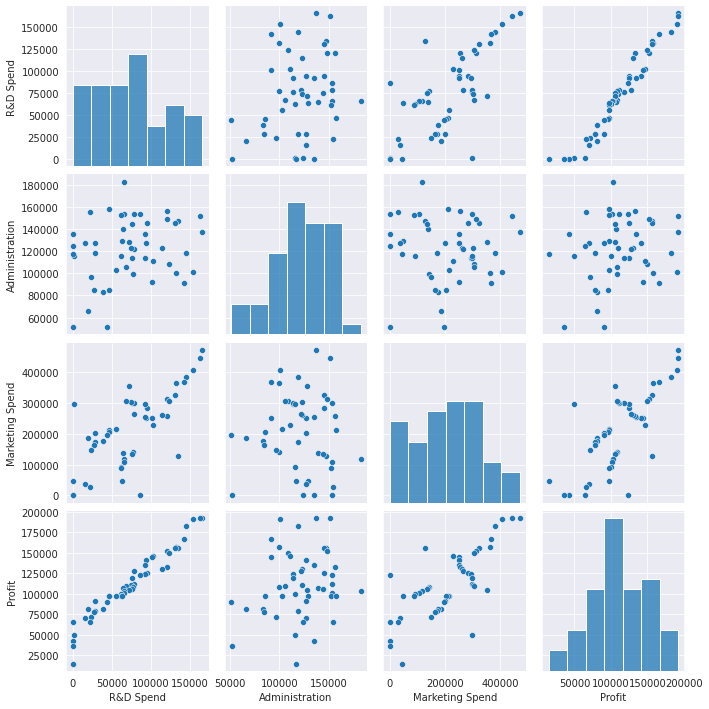

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [7]:
df=pd.get_dummies(df,columns=['State'])

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
df = df.rename({'R&D Spend': 'RD_exp','Administration': 'Admin_exp','Marketing Spend': 'Marketing_exp','State_New York': 'State_NewYork'}, axis=1)

In [10]:
df.head()

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Preparing a model

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_exp+Admin_exp+Marketing_exp+State_California+State_Florida+State_NewYork',data=df).fit()

In [12]:
#Coefficients
model.params

Intercept           37633.233317
RD_exp                  0.806023
Admin_exp              -0.027004
Marketing_exp           0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            7.417409
RD_exp              17.368580
Admin_exp           -0.517012
Marketing_exp        1.573889
State_California     5.099242
State_Florida        4.654306
State_NewYork        5.007401
dtype: float64 
 Intercept           2.807645e-09
RD_exp              2.578772e-21
Admin_exp           6.077373e-01
Marketing_exp       1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Calculating VIF

In [15]:
rsq_RD_exp = smf.ols('RD_exp~Admin_exp+Marketing_exp+State_California+State_Florida+State_NewYork',data=df).fit().rsquared  
rsq_RD_exp = 1/(1-rsq_RD_exp)

print(rsq_RD_exp)

2.4955109215494433


In [16]:
rsq_Admin_exp = smf.ols('Admin_exp~RD_exp+Marketing_exp+State_California+State_Florida+State_NewYork',data=df).fit().rsquared  
rsq_Admin_exp = 1/(1-rsq_Admin_exp)

print(rsq_Admin_exp)

1.1777660508993844


In [17]:
rsq_Marketing_exp = smf.ols('Marketing_exp~Admin_exp+RD_exp+State_California+State_Florida+State_NewYork',data=df).fit().rsquared  
rsq_Marketing_exp = 1/(1-rsq_Marketing_exp)

print(rsq_Marketing_exp)

2.4167967566863946


In [18]:
rsq_State_California = smf.ols('State_California~Marketing_exp+Admin_exp+RD_exp+State_Florida+State_NewYork',data=df).fit().rsquared  
rsq_State_California = 1/(1-rsq_State_California)

print(rsq_State_California)

inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [19]:
rsq_State_Florida = smf.ols('State_Florida~Marketing_exp+Admin_exp+RD_exp+State_California+State_NewYork',data=df).fit().rsquared  
rsq_State_Florida = 1/(1-rsq_State_Florida)

print(rsq_State_Florida)

inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [20]:
rsq_State_NewYork = smf.ols('State_NewYork~Marketing_exp+Admin_exp+RD_exp+State_California+State_Florida',data=df).fit().rsquared  
rsq_State_NewYork = 1/(1-rsq_State_NewYork)

print(rsq_State_NewYork)

inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [21]:
# Storing vif values in a data frame
d1 = {'Variables':['rsq_RD_exp','rsq_Admin_exp','rsq_Marketing_exp','rsq_State_California','rsq_State_Florida','rsq_State_NewYork'],'VIF':[rsq_RD_exp,rsq_Admin_exp,rsq_Marketing_exp,rsq_State_California,rsq_State_Florida,rsq_State_NewYork]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rsq_RD_exp,2.495511
1,rsq_Admin_exp,1.177766
2,rsq_Marketing_exp,2.416797
3,rsq_State_California,inf
4,rsq_State_Florida,inf
5,rsq_State_NewYork,inf


#Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)


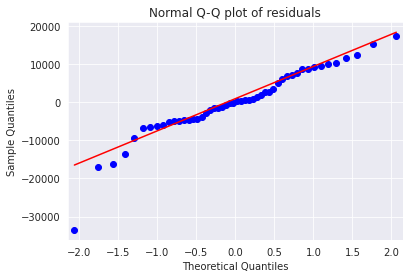

In [22]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [40]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45])]

#Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

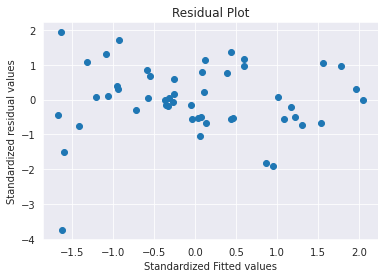

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

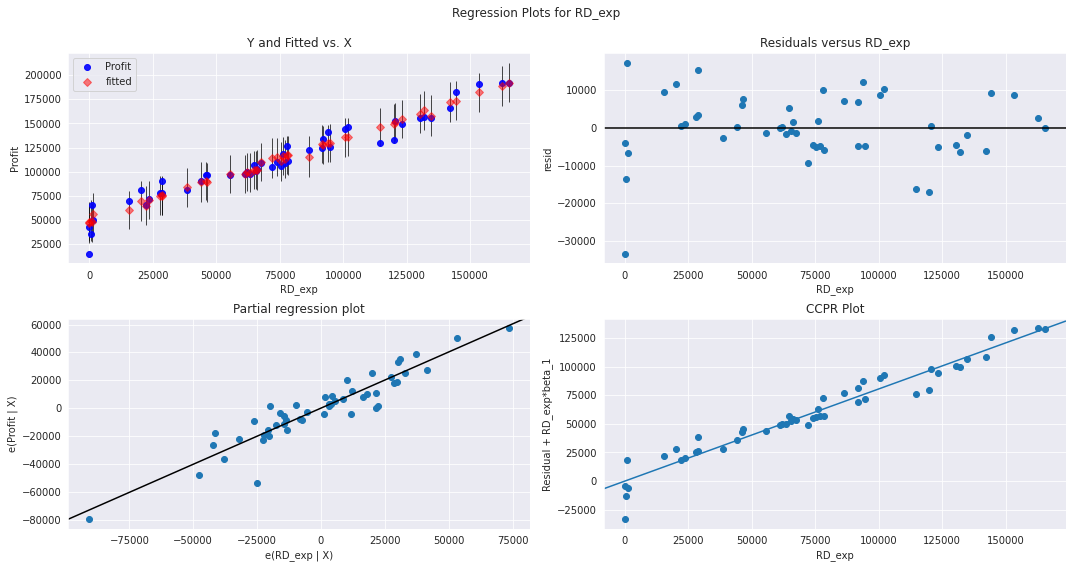

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_exp", fig=fig)
plt.show()

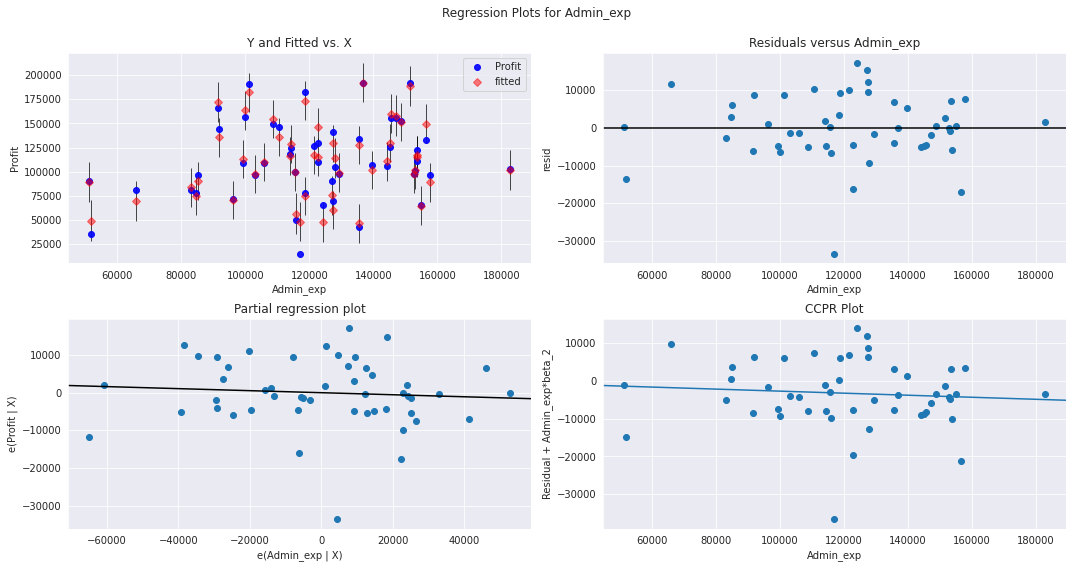

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin_exp", fig=fig)
plt.show()

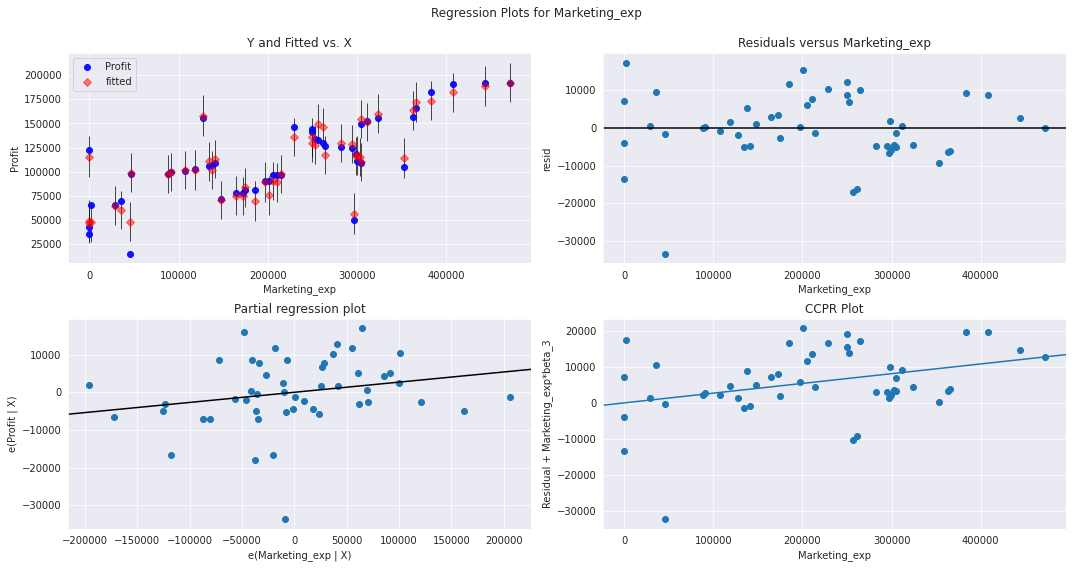

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_exp", fig=fig)
plt.show()

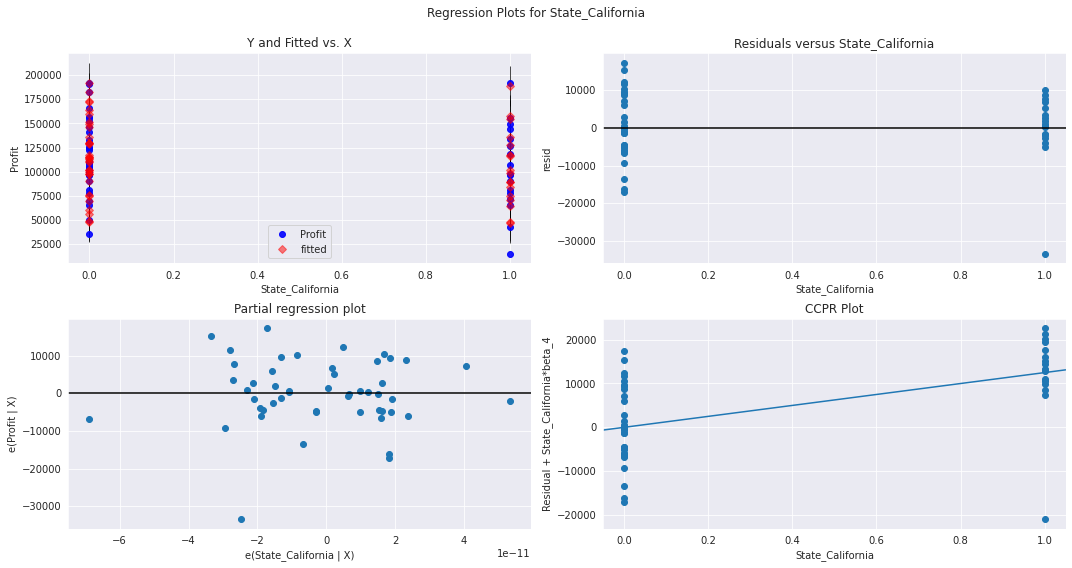

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_California", fig=fig)
plt.show()

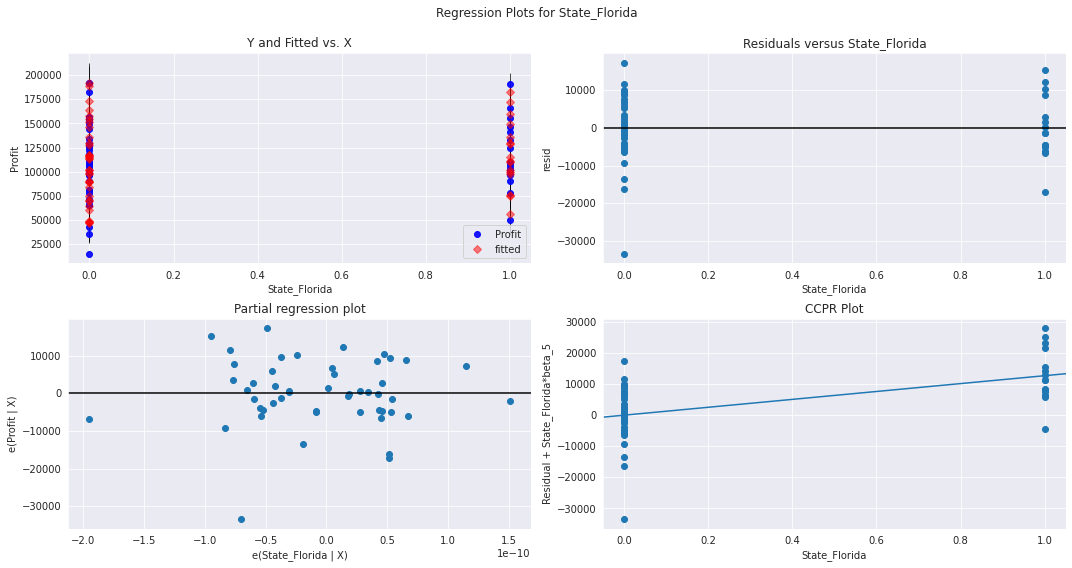

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_Florida", fig=fig)
plt.show()

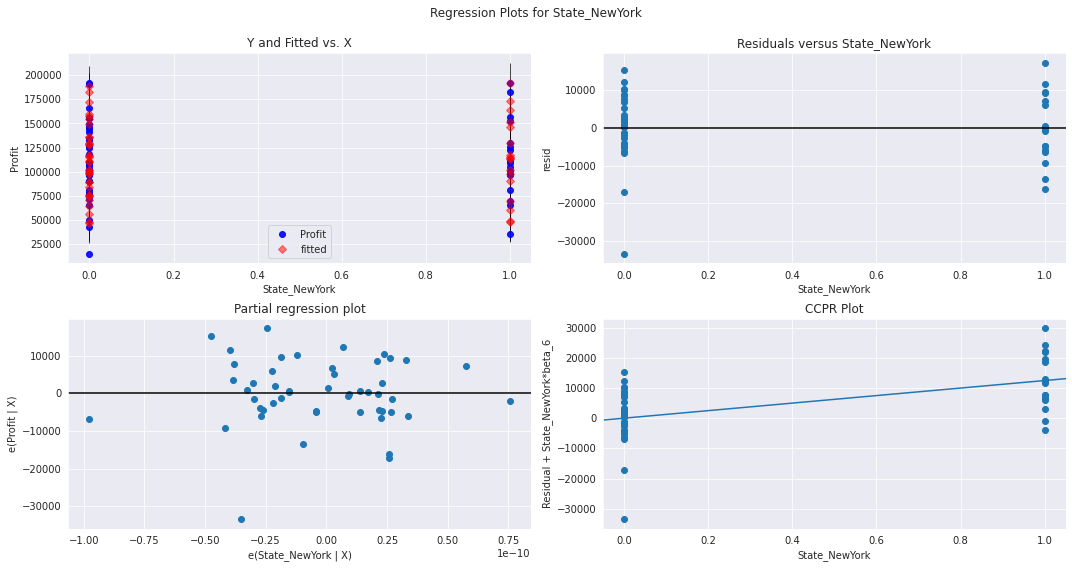

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State_NewYork", fig=fig)
plt.show()

# Model Deletion Diagnostics


#Cook’s Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


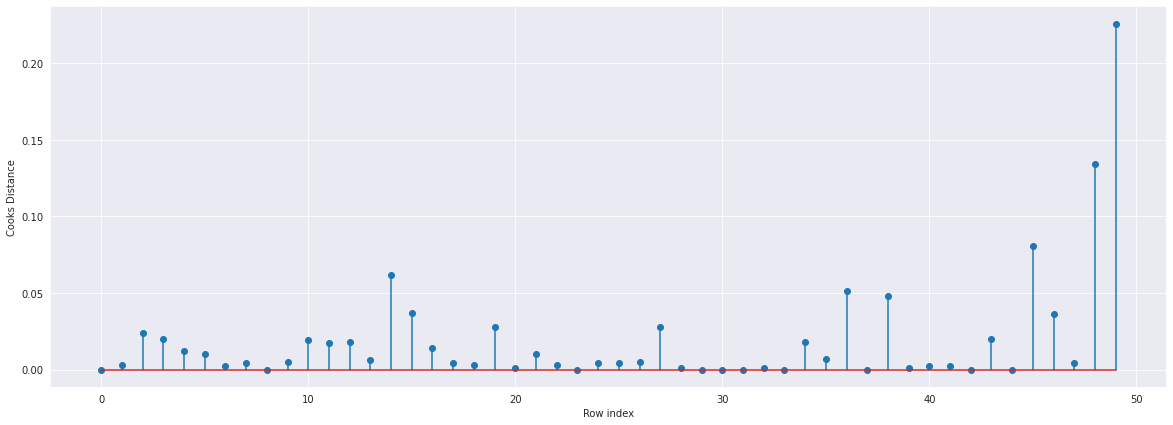

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer
(np.argmax(c),np.max(c))

(49, 0.22625094501509233)

#High Influence points

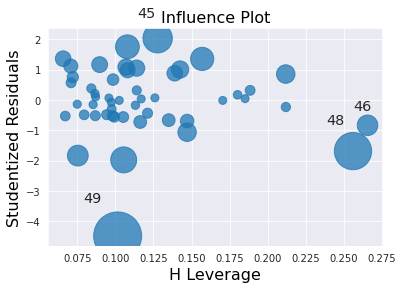

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [44]:
leverage_cutoff

0.48

In [ ]:
#As all the values are within range of 0.48 there is no need to imporve the model 

#Model

In [36]:
#Check the accuracy of the model
final_model = smf.ols('Profit~RD_exp+Admin_exp+Marketing_exp+State_California+State_Florida+State_NewYork',data=df).fit()
(final_model.rsquared,final_model.aic)

(0.9507524843355148, 1062.764909597834)

#Predicting for new data

In [37]:
#New data for prediction
new_data=pd.DataFrame({'RD_exp':400000,"Admin_exp":950000,"Marketing_exp":102000,"State_California":0,"State_Florida":1,"State_NewYork":0},index=[1])

In [38]:
final_model.predict(new_data)

1    349831.220352
dtype: float64

In [39]:
pred_y = final_model.predict(df)
pred_y

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790
